In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Dataset Description

In [3]:

#reading the customer data
customer_data = pd.read_csv("data/Train.csv")

In [4]:
#viewing the data frame
customer_data.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
# showing the general structure of dataframe
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [6]:
# show the dimensions
print(f'Number of Rows: {customer_data.shape[0]}')
print(f'Number of Columns: {customer_data.shape[1]}')

Number of Rows: 8068
Number of Columns: 11


In [7]:
customer_data.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

### Data Cleaning

In [8]:
# Seeing if there exist null values in the columns and listing if there are null values
customer_data.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [9]:
# The dataset is quite small, so we try to impute the missing values instead of removing them
# Since the age at which person get married are rather similar in general, context. We should impute ever_married with mode after grouping with age
mode_of_ever_married_by_age = customer_data.groupby("Age")['Ever_Married'].apply(lambda x:x.mode().iloc[0])

In [10]:
# replace the missing ever_married data by the mode
customer_data['Ever_Married'] = customer_data['Ever_Married'].fillna(customer_data['Age'].map(mode_of_ever_married_by_age))

In [11]:
# imputing graduated
# checking correlation between age and graduated
correlation_between_age_graduated = customer_data['Age'].corr( customer_data['Graduated'].map({'Yes': 1, 'No': 0}))
print(f'{correlation_between_age_graduated}')

0.23730934258442968


In [12]:
# since the correlation is small, there only weak correlation between age and graduation.
# so, we will just impute graduated with its mode
customer_data['Graduated'].fillna(customer_data['Graduated'].mode()[0], inplace=True)

In [13]:
# imputing profession
customer_data['Profession'].fillna(customer_data['Profession'].mode()[0], inplace=True)

In [14]:
# imputing work_experience by median
customer_data['Work_Experience'].fillna(customer_data['Work_Experience'].median(), inplace =True)

In [15]:
# imputing family size
customer_data['Family_Size'].fillna(customer_data['Family_Size'].median(), inplace =True)

In [16]:
customer_data['Var_1'].fillna(customer_data['Var_1'].mode()[0], inplace =True)

In [17]:
# From this it can be seen all the data has been imputed, and there dont exist any null values
customer_data.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

### Data Exploration

In [18]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='Count'>

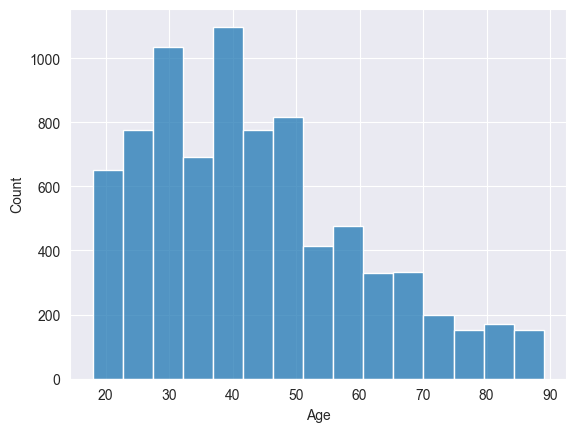

In [25]:
sns.histplot(customer_data["Age"], bins=15)

In [26]:
customer_data["Age"].describe()

count    8068.000000
mean       43.466906
std        16.711696
min        18.000000
25%        30.000000
50%        40.000000
75%        53.000000
max        89.000000
Name: Age, dtype: float64

The distribution of Age seems to be right skewed for the dataset for the following reasons:
* The mean (43.47) is greater than the median (40). In a right-skewed distribution, the mean is typically larger than the median because the presence of higher values on the right side of the distribution pulls the mean towards the right.
* The third quartile (75th percentile) is 53, while the maximum age is 89. This indicates that there is a longer tail on the right side of the distribution, with a few relatively higher values.

This indicates that most of the customers are younger.


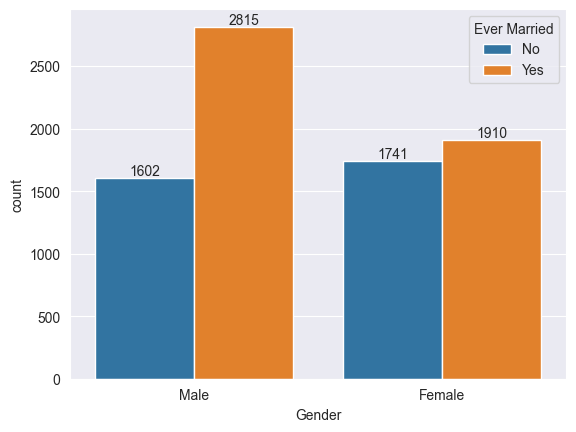

In [43]:
# Which gender shops the most?
plt.figure()
ax = sns.countplot(x='Gender', hue="Ever_Married",data=customer_data)

# add count numbers on top of each bar
for p in ax.patches:
    ax.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.ylabel("Gender")
plt.legend(title="Ever Married")

This shows that in this dataset, the customers are mostly male. However, it can be seen that the number of male and female customers which are in similar ranges, but number of married males is significantly higher than number of married female.